Chapter 05

# 多项分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码计算并可视化了多项式分布的概率质量函数（PMF）。给定三个类别的概率 \( p = [p_1, p_2, p_3] \) 和试验次数 `num=8`，该代码生成了所有可能的结果组合 \((x_1, x_2, x_3)\)，计算各组合出现的PMF值，并以不同方式可视化此分布，包括3D散点图、热力图和3D茎叶图。

多项式分布的概率质量函数公式为：
$$
P(X_1 = x_1, X_2 = x_2, X_3 = x_3) = \frac{n!}{x_1! x_2! x_3!} p_1^{x_1} p_2^{x_2} p_3^{x_3}
$$

In [1]:
from scipy.stats import multinomial
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns

## 设置试验次数和类别取值范围

In [2]:
num = 8 # 设置总试验次数为8
x1_array = np.arange(num + 1) # 生成x1的取值范围
x2_array = np.arange(num + 1) # 生成x2的取值范围

xx1, xx2 = np.meshgrid(x1_array, x2_array) # 创建x1和x2的网格

xx3 = num - xx1 - xx2 # 根据x1和x2计算x3
xx3 = np.where(xx3 >= 0.0, xx3, np.nan) # 对于不符合条件的组合，设置为NaN

## 自定义函数：绘制热力图

In [3]:
def heatmap_sum(data, i_array, j_array, title, vmin, vmax, cmap, annot=False):
    fig, ax = plt.subplots(figsize=(10, 10)) # 创建绘图窗口
    ax = sns.heatmap(data, cmap=cmap, # 绘制热力图
                     cbar_kws={"orientation": "horizontal"},
                     yticklabels=i_array, xticklabels=j_array,
                     ax=ax, annot=annot,
                     linewidths=0.25, linecolor='grey',
                     vmin=vmin, vmax=vmax,
                     fmt='.3f')
    ax.set_xlabel('$x_1$') # 设置x轴标签
    ax.set_ylabel('$x_2$') # 设置y轴标签
    ax.invert_yaxis() # 反转y轴
    ax.set_aspect("equal") # 设置坐标系比例
    plt.title(title) # 设置标题
    plt.yticks(rotation=0) # 设置y轴标签旋转角度

## 计算多项式分布的PMF

In [4]:
p_array = [0.1, 0.6, 0.3] # 设置每个类别的概率
PMF_ff = multinomial.pmf(x=np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])).T, 
                         n=num, p=p_array) # 计算PMF
PMF_ff = np.where(PMF_ff > 0.0, PMF_ff, np.nan) # 将PMF中小于等于0的值设为NaN
PMF_ff = np.reshape(PMF_ff, xx1.shape) # 将PMF重塑为xx1的形状

C:\Users\james\anaconda3\Lib\site-packages\scipy\stats\_multivariate.py:3287: RuntimeWarning: invalid value encountered in cast
  xx = np.asarray(x, dtype=int)


In [5]:
df = pd.DataFrame(np.flipud(PMF_ff)) # 将PMF翻转并转为DataFrame

## 3D/2D散点图

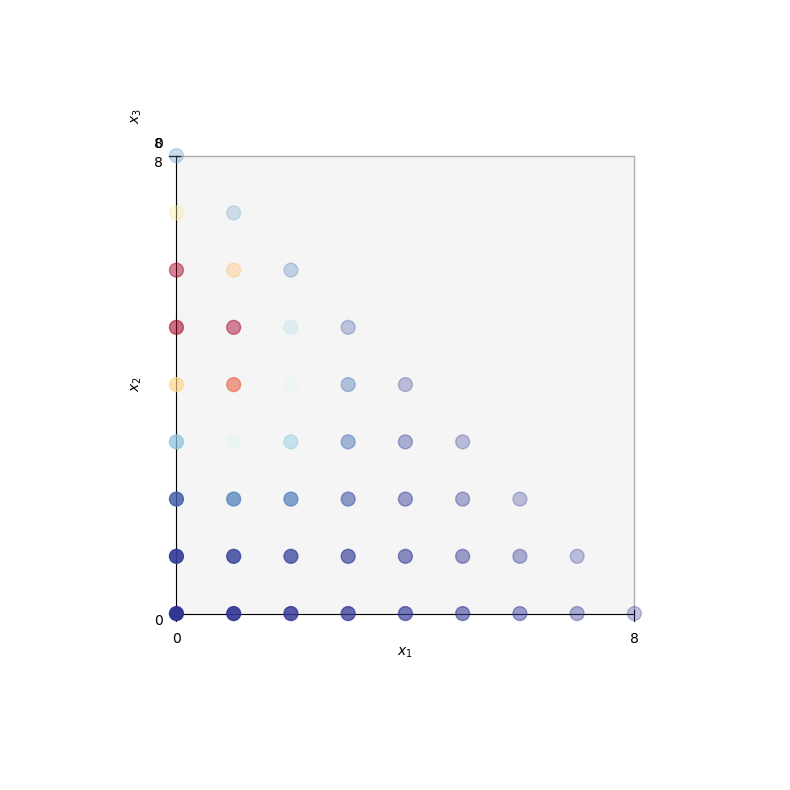

In [6]:
fig = plt.figure(figsize=(10, 10)) # 创建3D绘图窗口
ax = plt.axes(projection="3d") # 设置3D投影

ax.scatter3D(xx1.ravel(), xx2.ravel(), xx3.ravel(), 
             s=400, marker='.', c=PMF_ff.ravel(), cmap='RdYlBu_r') # 绘制3D散点图，颜色代表PMF值

ax.set_proj_type('ortho') # 设置正交投影
ax.set_xlabel('$x_1$') # 设置x轴标签
ax.set_ylabel('$x_2$') # 设置y轴标签
ax.set_zlabel('$x_3$') # 设置z轴标签
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0)) # 设置x轴面板颜色
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0)) # 设置y轴面板颜色
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0)) # 设置z轴面板颜色

ax.set_xticks([0, num]) # 设置x轴刻度
ax.set_yticks([0, num]) # 设置y轴刻度
ax.set_zticks([0, num]) # 设置z轴刻度

ax.set_xlim(0, num) # 设置x轴范围
ax.set_ylim(0, num) # 设置y轴范围
ax.set_zlim3d(0, num) # 设置z轴范围
ax.view_init(azim=-90, elev=90) # 设置视角
ax.set_box_aspect(aspect=(1, 1, 1)) # 设置坐标轴比例
ax.grid() # 显示网格
plt.show() # 显示图形

## 热力图

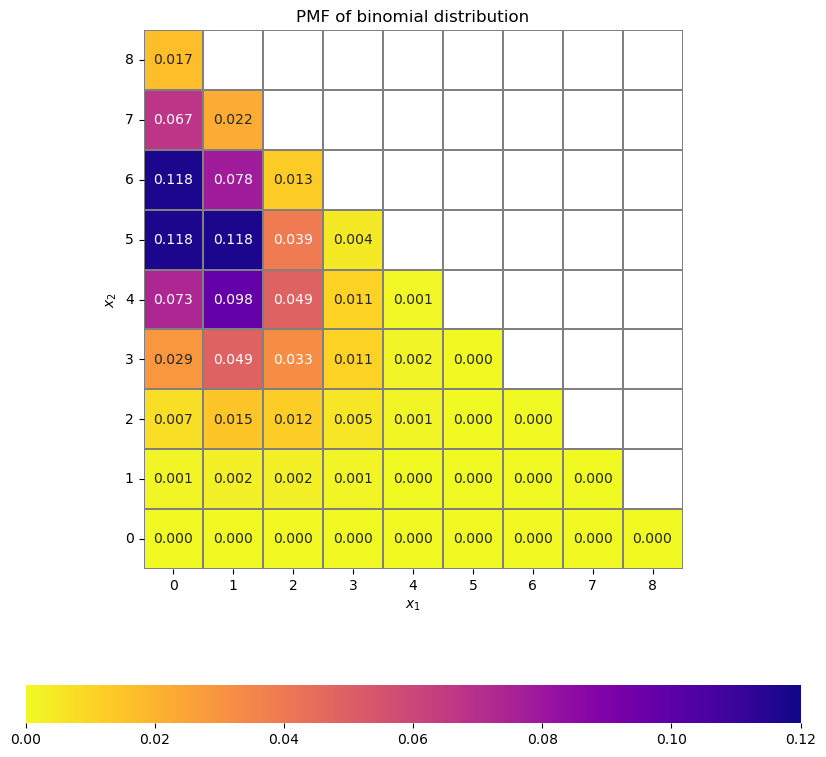

In [7]:
title = 'PMF of binomial distribution' # 标题
heatmap_sum(PMF_ff, x1_array, x2_array, title, 0, 0.12, 'plasma_r', True) # 绘制PMF的热力图

## 3D火柴梗图

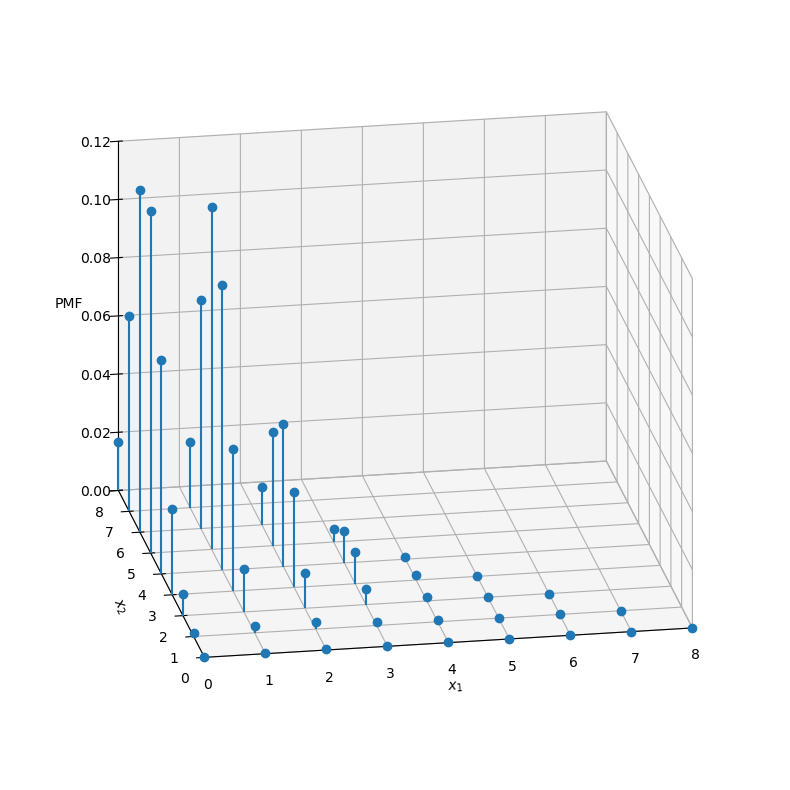

In [8]:
fig = plt.figure(figsize=(10, 10)) # 创建3D绘图窗口
ax = fig.add_subplot(111, projection='3d') # 设置3D投影

ax.stem(xx1.ravel(), xx2.ravel(), PMF_ff.ravel(), basefmt=" ") # 绘制3D茎叶图

ax.set_xlabel('$x_1$') # 设置x轴标签
ax.set_ylabel('$x_2$') # 设置y轴标签
ax.set_zlabel('PMF') # 设置z轴标签

ax.set_xlim((0, 8)) # 设置x轴范围
ax.set_ylim((0, 8)) # 设置y轴范围
ax.set_zlim((0, 0.12)) # 设置z轴范围
ax.view_init(azim=-100, elev=20) # 设置视角
ax.set_proj_type('ortho') # 设置正交投影
plt.show() # 显示图形

## 测试代码（计算单个组合的PMF值）
# print(multinomial.pmf(x=(5,2,1), n=num, p=p_array)) # 测试多项式分布的PMF计算